# **Testing Code with DASRPT**

In [ ]:
!git clone https://github.com/

In [1]:
## Data Handling
import numpy as np
import pandas as pd
import io

## Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Time Series Modeling
import statsmodels
import statsmodels.tsa.api as tsa
from statsmodels.tsa.seasonal import seasonal_decompose

import pmdarima as pmd
from pmdarima.arima import ndiffs
from pmdarima.arima import nsdiffs

In [2]:
# !pip3 install pmdarima

In [3]:
## Importing file from work computer directly
from google.colab import files
uploaded = files.upload()

Saving dasrpt.xlsx to dasrpt.xlsx


In [4]:
## Reading file into DataFrame
df2 = pd.read_excel(io.BytesIO(uploaded['dasrpt.xlsx']), header = 5,
                    sheet_name='Report', skipfooter=1)
df2

,Unnamed: 0,NON-GTD,GTD,Ad,Yt,Ch,Sold,Occupied,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,17-Nov-21 WED,59,41,117,1,275,0,0,217,8,0,66,76.68,27191.12,125.30,0
1,18-Nov-21 THU,22,46,144,73,278,0,0,212,6,0,71,74.91,26544.17,125.21,0
2,19-Nov-21 FRI,24,82,84,128,309,0,0,190,2,0,93,67.14,29073.38,153.02,0
3,20-Nov-21 SAT,20,82,94,96,360,0,0,196,2,0,87,69.26,32183.38,164.20,0
4,21-Nov-21 SUN,5,19,39,157,97,0,0,63,54,0,220,22.26,8334.52,132.29,0
5,22-Nov-21 MON,2,14,25,38,70,0,0,41,53,0,242,14.49,5668.44,138.25,0
6,23-Nov-21 TUE,9,27,27,14,121,0,0,63,53,0,220,22.26,8884.27,141.02,0
7,24-Nov-21 WED,14,56,47,16,222,0,0,117,1,0,166,41.34,18170.01,155.30,0
8,25-Nov-21 THU,13,60,104,13,354,0,0,177,1,0,106,62.54,29021.58,163.96,0
9,26-Nov-21 FRI,23,58,105,72,354,0,0,186,1,0,97,65.72,26543.55,142.71,0


In [5]:
## Renaming columns to proper names
df2.columns = ['date', 'arrivals_ngtd', 'arrivals_gtd', 'stay', 'depart',
               'guests_adult','guests_youth', 'guests_children', 'sold', 'ooo',
               'off', 'not_sold', 'percent_occupied', 'projected_room_revenue',
               'average_rate', 'waitlist']

df2

,date,arrivals_ngtd,arrivals_gtd,stay,depart,guests_adult,guests_youth,guests_children,sold,ooo,off,not_sold,percent_occupied,projected_room_revenue,average_rate,waitlist
0,17-Nov-21 WED,59,41,117,1,275,0,0,217,8,0,66,76.68,27191.12,125.30,0
1,18-Nov-21 THU,22,46,144,73,278,0,0,212,6,0,71,74.91,26544.17,125.21,0
2,19-Nov-21 FRI,24,82,84,128,309,0,0,190,2,0,93,67.14,29073.38,153.02,0
3,20-Nov-21 SAT,20,82,94,96,360,0,0,196,2,0,87,69.26,32183.38,164.20,0
4,21-Nov-21 SUN,5,19,39,157,97,0,0,63,54,0,220,22.26,8334.52,132.29,0
5,22-Nov-21 MON,2,14,25,38,70,0,0,41,53,0,242,14.49,5668.44,138.25,0
6,23-Nov-21 TUE,9,27,27,14,121,0,0,63,53,0,220,22.26,8884.27,141.02,0
7,24-Nov-21 WED,14,56,47,16,222,0,0,117,1,0,166,41.34,18170.01,155.30,0
8,25-Nov-21 THU,13,60,104,13,354,0,0,177,1,0,106,62.54,29021.58,163.96,0
9,26-Nov-21 FRI,23,58,105,72,354,0,0,186,1,0,97,65.72,26543.55,142.71,0


In [6]:
## Converting date to datetime format
df2.loc[:,'date'] = pd.to_datetime(df2.loc[:,'date'])
df2

,date,arrivals_ngtd,arrivals_gtd,stay,depart,guests_adult,guests_youth,guests_children,sold,ooo,off,not_sold,percent_occupied,projected_room_revenue,average_rate,waitlist
0,2021-11-17,59,41,117,1,275,0,0,217,8,0,66,76.68,27191.12,125.30,0
1,2021-11-18,22,46,144,73,278,0,0,212,6,0,71,74.91,26544.17,125.21,0
2,2021-11-19,24,82,84,128,309,0,0,190,2,0,93,67.14,29073.38,153.02,0
3,2021-11-20,20,82,94,96,360,0,0,196,2,0,87,69.26,32183.38,164.20,0
4,2021-11-21,5,19,39,157,97,0,0,63,54,0,220,22.26,8334.52,132.29,0
5,2021-11-22,2,14,25,38,70,0,0,41,53,0,242,14.49,5668.44,138.25,0
6,2021-11-23,9,27,27,14,121,0,0,63,53,0,220,22.26,8884.27,141.02,0
7,2021-11-24,14,56,47,16,222,0,0,117,1,0,166,41.34,18170.01,155.30,0
8,2021-11-25,13,60,104,13,354,0,0,177,1,0,106,62.54,29021.58,163.96,0
9,2021-11-26,23,58,105,72,354,0,0,186,1,0,97,65.72,26543.55,142.71,0


In [7]:
## Setting datetime index
df2 = df2.set_index('date', drop=True)
df2

,arrivals_ngtd,arrivals_gtd,stay,depart,guests_adult,guests_youth,guests_children,sold,ooo,off,not_sold,percent_occupied,projected_room_revenue,average_rate,waitlist
date,,,,,,,,,,,,,,,
2021-11-17,59,41,117,1,275,0,0,217,8,0,66,76.68,27191.12,125.30,0
2021-11-18,22,46,144,73,278,0,0,212,6,0,71,74.91,26544.17,125.21,0
2021-11-19,24,82,84,128,309,0,0,190,2,0,93,67.14,29073.38,153.02,0
2021-11-20,20,82,94,96,360,0,0,196,2,0,87,69.26,32183.38,164.20,0
2021-11-21,5,19,39,157,97,0,0,63,54,0,220,22.26,8334.52,132.29,0
2021-11-22,2,14,25,38,70,0,0,41,53,0,242,14.49,5668.44,138.25,0
2021-11-23,9,27,27,14,121,0,0,63,53,0,220,22.26,8884.27,141.02,0
2021-11-24,14,56,47,16,222,0,0,117,1,0,166,41.34,18170.01,155.30,0
2021-11-25,13,60,104,13,354,0,0,177,1,0,106,62.54,29021.58,163.96,0


In [8]:
## Identifying datatypes
df2.dtypes

arrivals_ngtd               int64
arrivals_gtd                int64
stay                        int64
depart                      int64
guests_adult                int64
guests_youth                int64
guests_children             int64
sold                        int64
ooo                         int64
off                         int64
not_sold                    int64
percent_occupied          float64
projected_room_revenue    float64
average_rate              float64
waitlist                    int64
dtype: object

In [ ]:
## Checking for missing values
df2.isnull().sum()

arrivals_ngtd             0
arrivals_gtd              0
stay                      0
depart                    0
guests_adult              0
guests_youth              0
guests_children           0
sold                      0
ooo                       0
off                       0
not_sold                  0
percent_occupied          0
projected_room_revenue    0
average_rate              0
waitlist                  0
dtype: int64

In [ ]:
df2['total_arrivals'] = df2['arrivals_gtd'] + df2['arrivals_ngtd']
df2['total_arrivals']

date
2021-11-17    100
2021-11-18     68
2021-11-19    106
2021-11-20    102
2021-11-21     24
2021-11-22     16
2021-11-23     36
2021-11-24     70
2021-11-25     73
2021-11-26     81
2021-11-27     36
Name: total_arrivals, dtype: int64

In [ ]:
df_dropped = df2.drop(['arrivals_gtd', 'arrivals_ngtd', 'waitlist', 'guests_youth', 'guests_children'], axis = 1)
df_dropped

,stay,depart,guests_adult,sold,ooo,off,not_sold,percent_occupied,projected_room_revenue,average_rate,total_arrivals
date,,,,,,,,,,,
2021-11-17,117,1,275,217,8,0,66,76.68,27191.12,125.30,100
2021-11-18,144,73,278,212,6,0,71,74.91,26544.17,125.21,68
2021-11-19,84,128,309,190,2,0,93,67.14,29073.38,153.02,106
2021-11-20,94,96,360,196,2,0,87,69.26,32183.38,164.20,102
2021-11-21,39,157,97,63,54,0,220,22.26,8334.52,132.29,24
2021-11-22,25,38,70,41,53,0,242,14.49,5668.44,138.25,16
2021-11-23,27,14,121,63,53,0,220,22.26,8884.27,141.02,36
2021-11-24,47,16,222,117,1,0,166,41.34,18170.01,155.30,70
2021-11-25,104,13,354,177,1,0,106,62.54,29021.58,163.96,73


In [ ]:
df_dropped = df_dropped.reindex(columns = ['total_arrivals', 'depart', 'stay', 'sold', 'ooo', 'off', 'not_sold',
 'percent_occupied', 'projected_room_revenue', 'average_rate'])
df_dropped

,total_arrivals,depart,stay,sold,ooo,off,not_sold,percent_occupied,projected_room_revenue,average_rate
date,,,,,,,,,,
2021-11-17,100,1,117,217,8,0,66,76.68,27191.12,125.30
2021-11-18,68,73,144,212,6,0,71,74.91,26544.17,125.21
2021-11-19,106,128,84,190,2,0,93,67.14,29073.38,153.02
2021-11-20,102,96,94,196,2,0,87,69.26,32183.38,164.20
2021-11-21,24,157,39,63,54,0,220,22.26,8334.52,132.29
2021-11-22,16,38,25,41,53,0,242,14.49,5668.44,138.25
2021-11-23,36,14,27,63,53,0,220,22.26,8884.27,141.02
2021-11-24,70,16,47,117,1,0,166,41.34,18170.01,155.30
2021-11-25,73,13,104,177,1,0,106,62.54,29021.58,163.96


# **Train/Test Split**

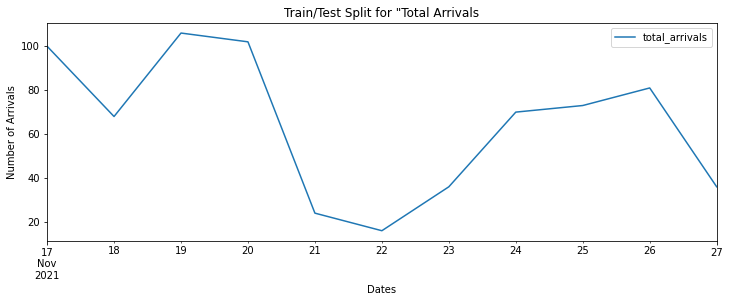

In [ ]:
## Visualizing first feature priot to split

fig, ax = plt.subplots(figsize = (12,4))
ax = df_dropped.loc[:, 'total_arrivals'].plot()
ax.legend()
ax.set_xlabel('Dates')
ax.set_ylabel('Number of Arrivals')
ax.set_title(f'Train/Test Split for "Total Arrivals');

In [ ]:
%matplotlib inline

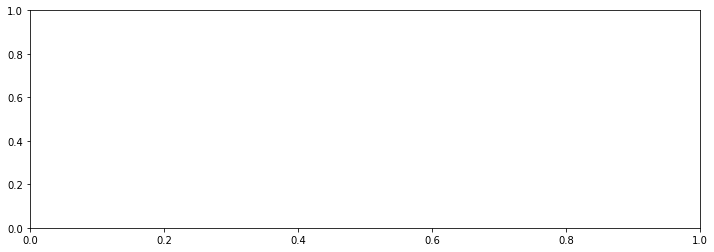

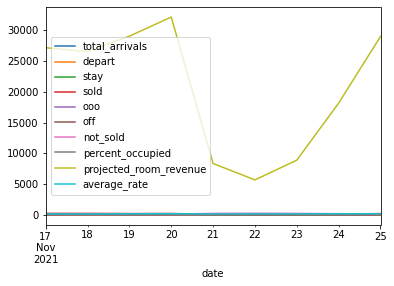

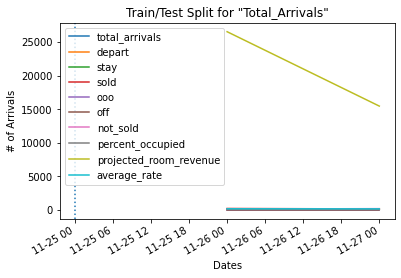

In [ ]:
## Splitting Data

tts_cutoff = round(df_dropped.shape[0]*.85)
train = df_dropped.iloc[:tts_cutoff]
test = df_dropped.iloc[tts_cutoff:]

## Plot
fig, ax = plt.subplots(1, 1, figsize = (12,4))
ax = train.plot(label='Train')
ax = test.plot(label='Test')
ax.legend()
ax.set_xlabel('Dates')
ax.set_ylabel('# of Arrivals')
ax.set_title(f'Train/Test Split for "Total_Arrivals"')
ax.axvline(train.index[-1], linestyle=":");